## Snakes and Ladders

Inicializando os valores e bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
MAX_ROUNDS = 200

transition_matrix = np.zeros((101,101))
prob_on_current_turn = np.zeros(101)
prob_on_next_turn = np.zeros(101)

snakes_and_ladders = {
    # ladders
    1 : 38, 
    4 : 14,
    9 : 31,
    21 : 42,
    28 : 84,
    36 : 44,
    51 : 67,
    71 : 91,
    80 : 100,
    # snakes
    98 : 78,
    95 : 75,
    93 : 73,
    87 : 24,
    64 : 60,
    62 : 19,
    56 : 53,
    49 : 11,
    48 : 26,
    16 : 6
}

### Matriz de Transição

In [3]:
def possible_outcomes(start):
    outcomes = np.arange(start+1, start+7)
    
    for i in range(len(outcomes)):
        
        if start not in snakes_and_ladders:
            outcomes[i] = snakes_and_ladders.get(outcomes[i], outcomes[i])
        
            if (outcomes[i] > 100):
                outcomes[i] =  100
        else:
            outcomes[i] = 0
    
    return(outcomes)

In [4]:
# transition matrix
for idx in range(101):

    if idx not in snakes_and_ladders:
        next_roll_outcomes = possible_outcomes(idx)
        
        for position in next_roll_outcomes:
            transition_matrix[position, idx] = transition_matrix[position, idx] + 1/6
        

### Iterações das rodadas

In [5]:
prob_on_current_turn[0] = 1
prob_on_next_turn[0] = 1

cumulative_prob_of_winning = np.zeros(MAX_ROUNDS)
current_prob_of_winning = np.zeros(MAX_ROUNDS)

for turn in range(MAX_ROUNDS):
    cumulative_prob_of_winning[turn] = prob_on_current_turn[-1]
    
    prob_on_next_turn = transition_matrix.dot(prob_on_current_turn)
    
    current_prob_of_winning[turn] = prob_on_next_turn[-1] - prob_on_current_turn[-1]
    prob_on_current_turn = prob_on_next_turn.copy()

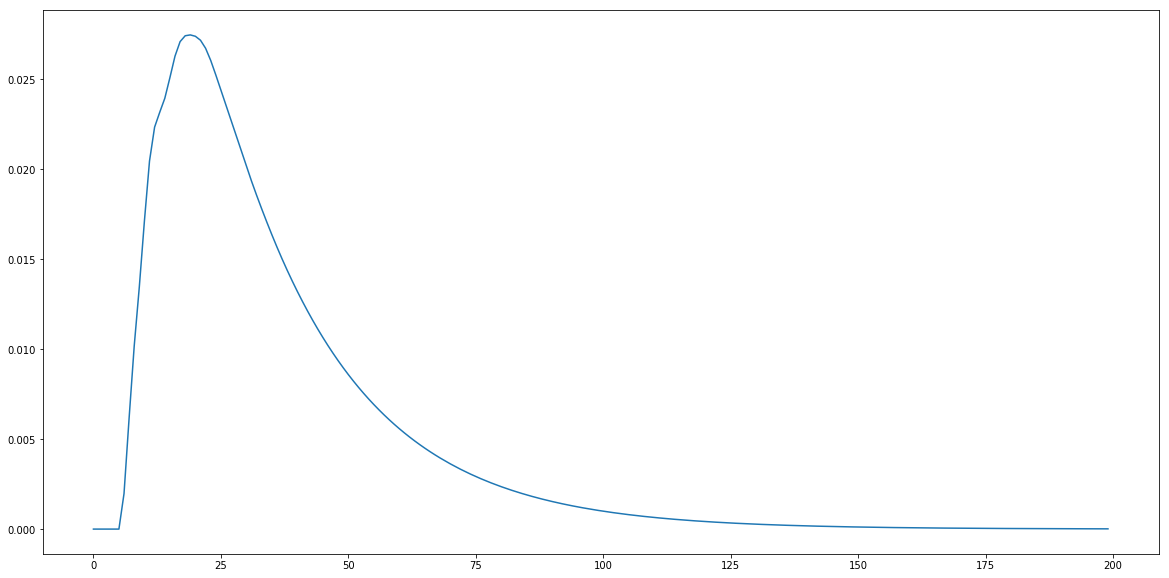

In [6]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(current_prob_of_winning)

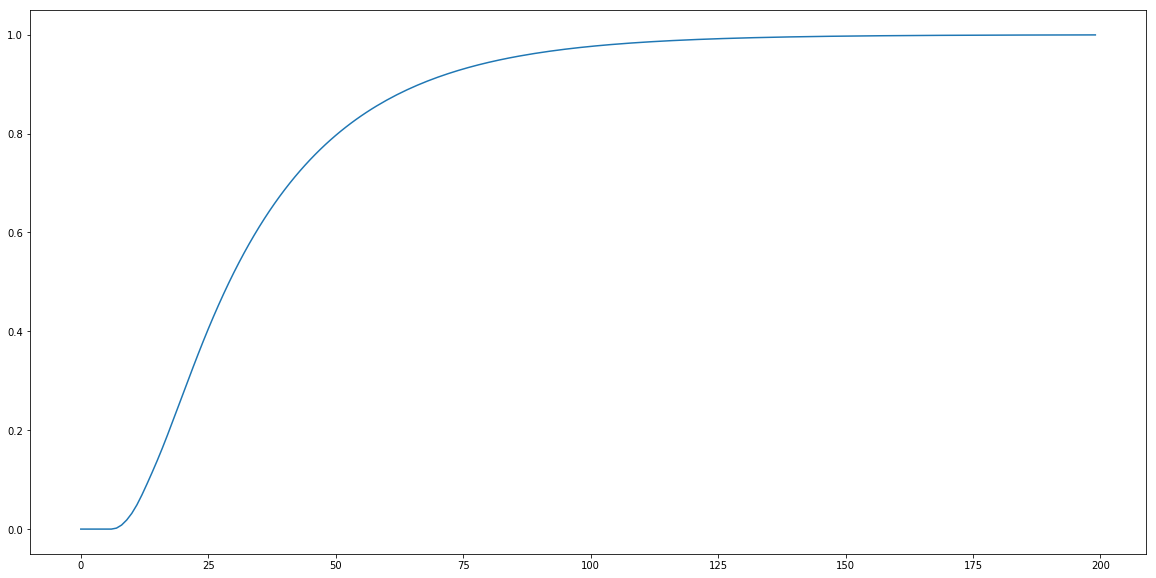

In [7]:
plt.plot(cumulative_prob_of_winning)